Computer Assignment 01: Exploratory Data Analysis_House Price Dataset_ Jerry Hsu


Assignment Summary:

The goal of this assignment is to perform Exploratory Data Analysis (EDA) and data cleaning on the house price training dataset in order to produce a clean, well-understood, and analytics-ready dataset

This notebook Mainly covers: Part 1 (Data Understanding), Part 2 (Data Cleaning) and Part 3 Post Processing (Collinearity ONLY)

Part 4 will focus on practicing how to run a prediction model.

Dataset(Variables) Summary

After reviewing the dataset and the data description, each row represents a single house sale and each column describes a characteristic of the house or the sale.

The main target column: "SalePrice"

It represents the house sale price and also represents y for the machine learning model.

Important feature columns: "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea".

Because these variables describe key aspects of house quality and size, which are commonly strong drivers of house prices. Higher overall quality, larger living area, more basement space, and larger garage area generally 

indicate higher property value and show clear relationships with the target variable SalePrice.

Other feature columns: location-related, structural, condition, and sale-related variables that provide additional information about the property.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

# Part1: Understanding Dataset

1. Understand dataset structure
2. Univariate analysis
3. Bivariate analysis
4. Check Missing value
5. Outlier detection
6. Data Quality Report

## 1. Understand dataset structure

In [6]:
# Count how many rows and columns
print("Shape:", df.shape)


Shape: (1460, 81)


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(df.columns)
print("Target Column: SalePrice")

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# variables type: numeric vs categorical
df.info()
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns

print("Numeric variables:", len(num_cols))
print("Categorical variables:", len(cat_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Univariate analysis

Only focus on SalePrice Column and other important feature columns: "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea"

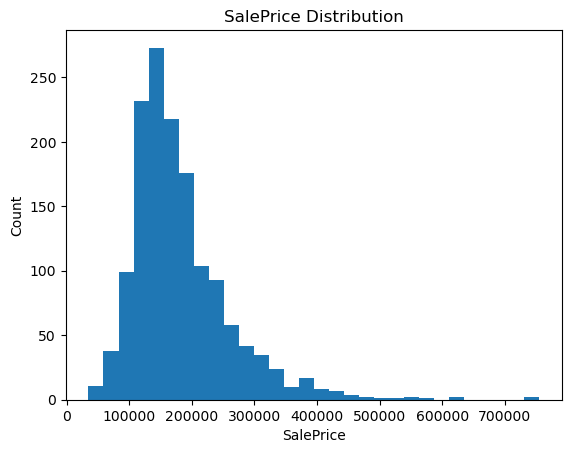

In [10]:
# SalePrice
plt.figure()
plt.hist(df["SalePrice"], bins=30)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()


Report: The SalePrice distribution is right-skewed, with most houses sold at lower price ranges and a small number of high-priced properties forming a long tail.

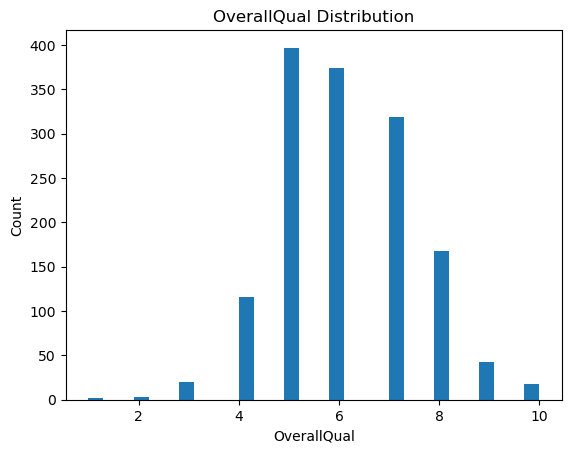

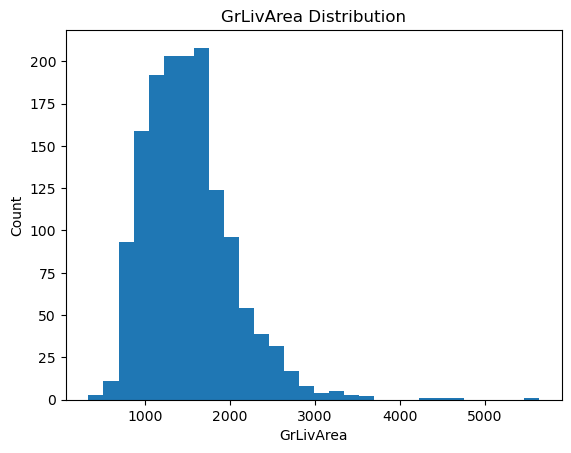

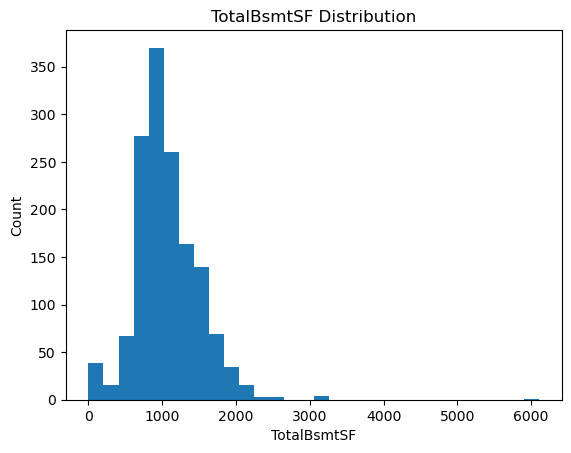

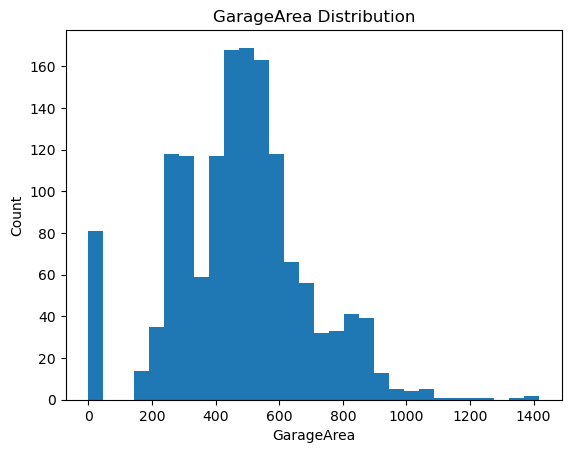

In [11]:
# important feature columns: "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea"

important_cols = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea"]
for col in important_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Report

OverallQual:
Most houses have an OverallQual score between 5 and 7, which means they are average to above-average in quality. Very low and very high quality houses are much less common.

GrLivArea:
GrLivArea is right-skewed, meaning most houses have a moderate living area, while a small number of houses are very large. These large houses may act as outliers and affect house prices.

TotalBsmtSF:
TotalBsmtSF is also right-skewed, with many houses having a medium-sized basement and a few houses having very large basements. Some houses have very small or zero basement area, which likely means they do not have a basement.

GarageArea:
Most houses have a garage of moderate size. Some houses have very small or no garage, and a few houses have very large garages. This shows the presence of both structural zeros and possible outliers.

## 3. Bivariate analysis

Relationship between "SaleParice" and other important feature columns

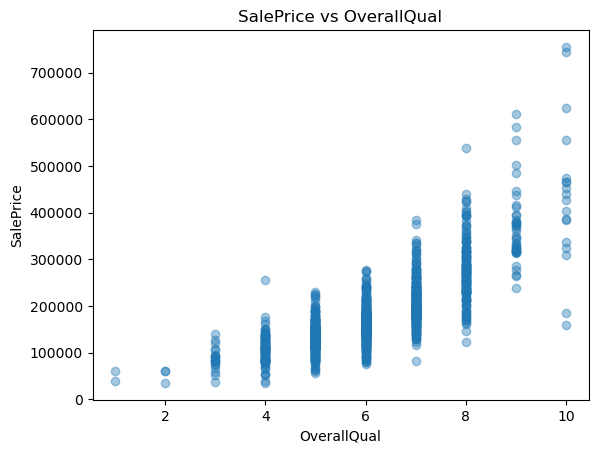

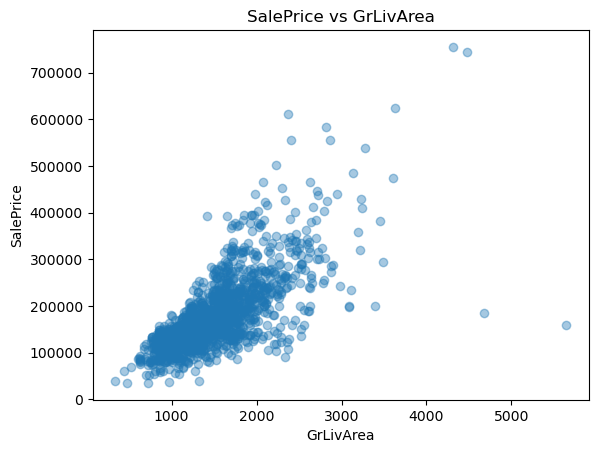

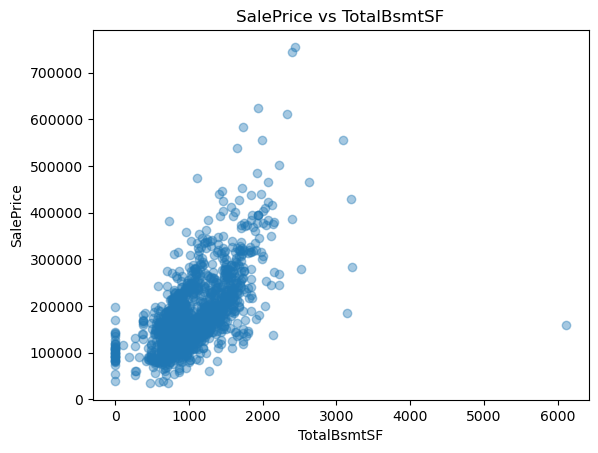

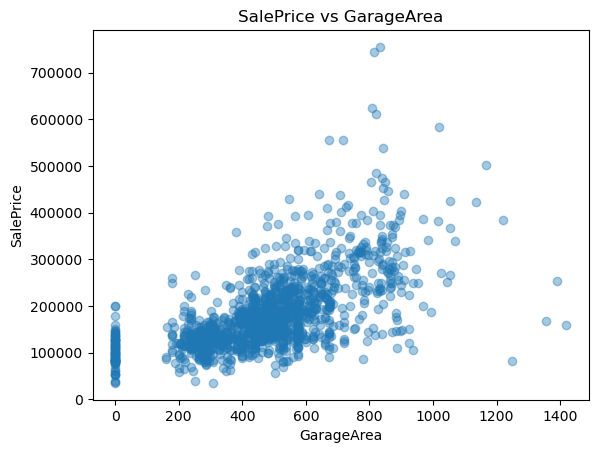

In [12]:

bivariate_cols = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea"]

for col in bivariate_cols:
    plt.figure()
    plt.scatter(df[col], df["SalePrice"], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.title(f"SalePrice vs {col}")
    plt.show()


Report

OverallQual:
Most houses have an OverallQual score between 5 and 7, which means they are average to above-average in quality. Very low and very high quality houses are much less common.

GrLivArea:
GrLivArea is right-skewed, meaning most houses have a moderate living area, while a small number of houses are very large. These large houses may act as outliers and affect house prices.

TotalBsmtSF:
TotalBsmtSF is also right-skewed, with many houses having a medium-sized basement and a few houses having very large basements. Some houses have very small or zero basement area, which likely means they do not have a basement.

GarageArea:
Most houses have a garage of moderate size. Some houses have very small or no garage, and a few houses have very large garages. This shows the presence of both structural zeros and possible outliers.

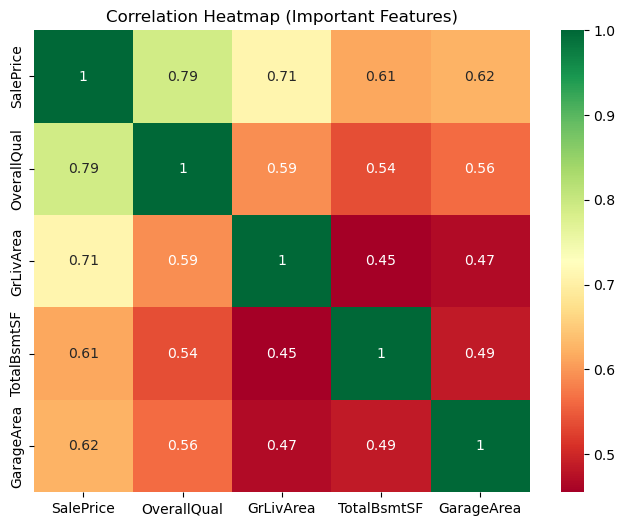

In [17]:
# select important numeric columns
important_cols = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea"
]

# create correlation matrix for important columns only
corr_matrix = df[important_cols].corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    cmap="RdYlGn",
    annot=True
)
plt.title("Correlation Heatmap (Important Features)")
plt.show()

Report:
This heatmap shows the correlation between the target variable SalePrice and the selected important features. Strong positive relationships can be seen between SalePrice and variables related to house quality and size, such as OverallQual and GrLivArea. This visualization helps understand how these key features are related before further analysis.

## 4. Check Missing value

In [ ]:
# Chech missing valus
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage": missing_percent
})

# Show only columns with missing values
missing_summary_table = missing_summary[missing_summary["Missing Count"] > 0].sort_values(by="Missing Count", ascending=False)

missing_summary_table


,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Report:

Missing value > 60% (Drop the column): Variables include: PoolQC, MiscFeature, Alley, Fence

Missing value 30% – 60% (Depend on decision): Variables include: MasVnrType, FireplaceQu

Missing value < 30% (Keep the column and impute), Variables include: LotFrontage, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, MasVnrArea, Electrical

## 5. Outlier detection

In [ ]:
# Outlier detection using IQR method (With ChatGPT help)

numeric_cols = df.select_dtypes(include="number").columns

def count_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

outlier_summary = {}

for col in numeric_cols:
    outlier_summary[col] = count_iqr_outliers(df[col].dropna())

outlier_df = (
    pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier Count"])
    .sort_values(by="Outlier Count", ascending=False)
)

outlier_df


,Outlier Count
EnclosedPorch,208
BsmtFinSF2,167
OverallCond,125
ScreenPorch,116
MSSubClass,103
MasVnrArea,96
LotFrontage,88
BsmtHalfBath,82
OpenPorchSF,77
LotArea,69


Report:

I use IQR method to shows that several numeric variables contain a large number of outliers. Outliers are most common in area-related features such as EnclosedPorch, BsmtFinSF2, ScreenPorch, LotArea, TotalBsmtSF, and GrLivArea. This indicates that most houses have moderate sizes, while a smaller number of houses have very large areas in these features.

The target variable SalePrice also contains outliers, which represent houses with extremely high sale prices. These values are expected in real estate data and likely reflect valid but rare properties rather than data errors.

Some count-based variables, such as the number of bedrooms and rooms, show fewer outliers, while time-related variables such as MoSold and YrSold show no outliers. Overall, the presence of outliers suggests that size- and value-related features have wide variability and should be handled carefully during data cleaning.

## 6. Data Quality Report

Data Quality Report

First, some columns have many missing values. For example, columns related to pools, fences, and alleys are missing for most houses, which means these features are not common and provide limited information. Other columns have some missing values because certain features do not exist for all houses, such as houses without a fireplace or garage.

Second, many size-related features, such as living area, basement size, and garage size, are not evenly distributed. Most houses are medium in size, while a small number of houses are very large. This creates uneven data patterns.

Third, there are some extreme values in the data, especially for house size and sale price. These extreme values represent very large or expensive houses. They are likely real cases, but they may affect analysis if not handled carefully.

Finally, the dataset includes different types of information, such as numbers, categories, and quality ratings. Some columns describe order or level (for example, quality scores), while others are simple labels. The Id column is only used to identify houses and does not add useful information.

These issues will be handled in the next step during data cleaning.

# Part2: Pre-processing


In [18]:
df_clean = df.copy()


In [20]:
# Chech missing valus
missing_count = df_clean.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage": missing_percent
})

# Show only columns with missing values
missing_summary_table = missing_summary[missing_summary["Missing Count"] > 0].sort_values(by="Missing Count", ascending=False)

missing_summary_table

,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [21]:
# Step1 Drop columns with > 60% missing values
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
df_clean = df_clean.drop(columns=drop_cols)



In [ ]:
# Step2 Missing values that mean “no feature” → fill with "None" (Help from ChatGPT to indentify the variables)
none_cols = [
    "FireplaceQu", "MasVnrType",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2"
]

for col in none_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("None")


In [ ]:
# Step3: Numeric missing values that mean zero → fill with 0 (Help from ChatGPT to indentify the variables)
zero_cols = [
    "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath",
    "GarageCars", "GarageArea"
]

for col in zero_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)


In [ ]:
# Step4: Remaining missing values (< 30%)
# numeric
for col in df_clean.select_dtypes(include="number").columns:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# categorical
for col in df_clean.select_dtypes(exclude="number").columns:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [27]:
# Step5: Drop the ID column
df_clean = df_clean.drop(columns=["Id"])

In [28]:
# Step6 Final Check
df_clean.isna().sum().sum()

0

Report:

First, some columns were removed because they had too many missing values. The columns PoolQC, MiscFeature, Alley, and Fence were dropped because most houses do not have these features, so the data was mostly empty. The Id column was also removed because it is only used to identify houses and does not describe the house itself.

Next, missing values that mean a feature does not exist were filled. For example, if a house does not have a basement, garage, or fireplace, the missing value was filled with "None" to clearly show that the feature is not present.

Then, numeric columns where missing values mean zero were filled with 0. This includes areas such as basement size and garage size. This makes the data easier to understand and more accurate.

After that, the remaining small number of missing values were filled. For numeric columns, the middle value was used. For categorical columns, the most common value was used.

Outliers were reviewed but not removed. Very large or expensive houses are real and expected, so they were kept in the dataset.

After all cleaning steps, the dataset has no missing values and no unnecessary columns. The data is now clean and ready for the next step.

# Part3: Post-processing


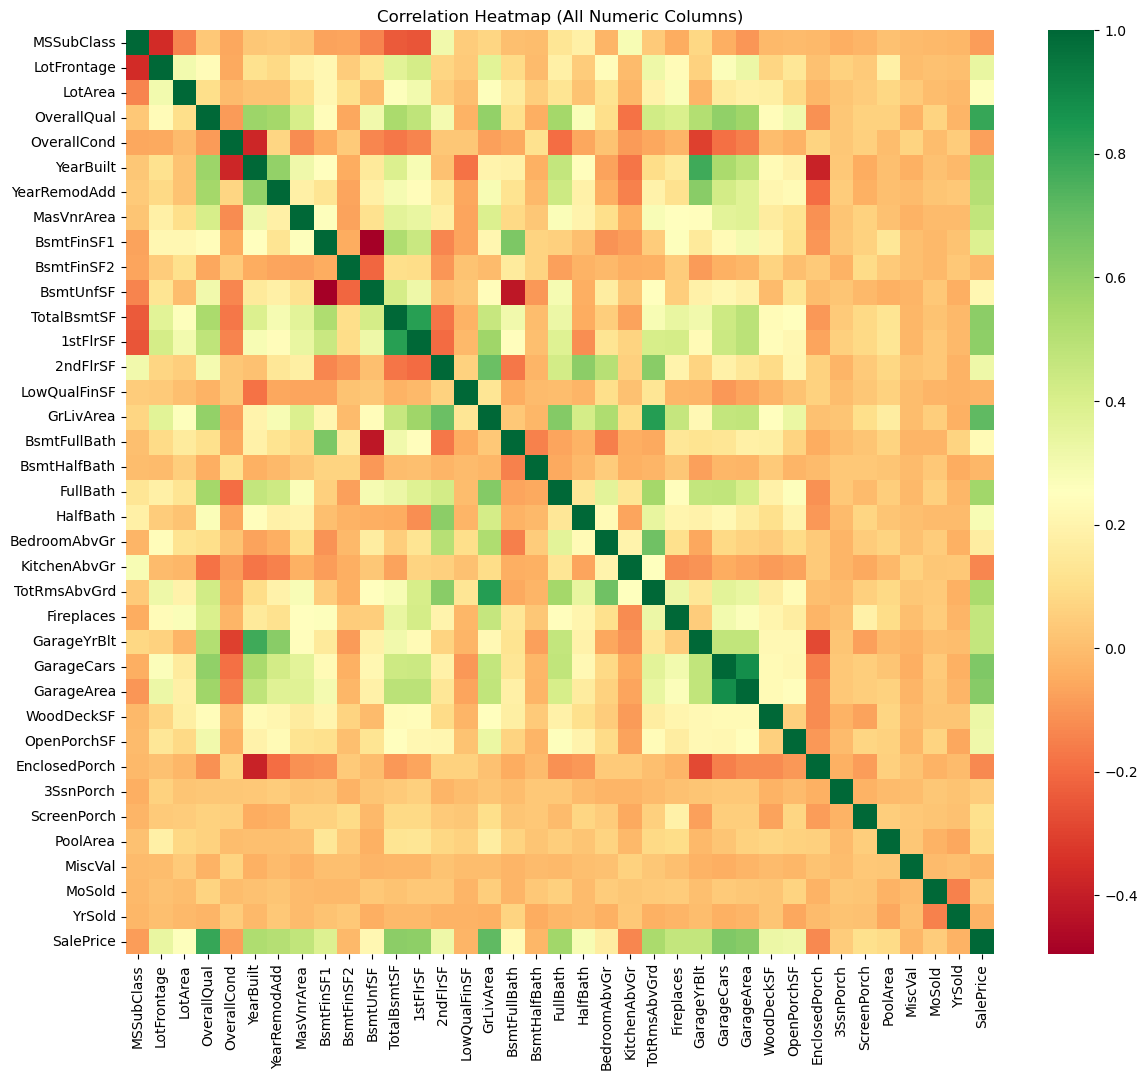

In [34]:
# Step1: Correlation heatmap
numeric_df = df_clean.select_dtypes(include="number")

# calculate correlation
corr_matrix = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="RdYlGn",
    annot=False
)
plt.title("Correlation Heatmap (All Numeric Columns)")
plt.show()

In [35]:
# Step2: Find highly correlated column pairs (Help From ChatGPT With Code)
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append([
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_value
            ])

high_corr_df = pd.DataFrame(
    high_corr_pairs,
    columns=["Column 1", "Column 2", "Correlation"]
).sort_values(by="Correlation", key=lambda x: abs(x), ascending=False)

high_corr_df


,Column 1,Column 2,Correlation
2,GarageArea,GarageCars,0.882475
1,TotRmsAbvGrd,GrLivArea,0.825489
0,1stFlrSF,TotalBsmtSF,0.819530


In [36]:
# Step3: remove highly correlated columns
cols_to_drop = ["GarageCars", "TotRmsAbvGrd", "1stFlrSF"]

df_final = df_clean.drop(columns=cols_to_drop)

df_final.shape


(1460, 73)

Report:

In this step, numeric columns were checked to see if some of them describe the same information. The correlation analysis showed that several column pairs are very strongly related.

The pairs GarageArea and GarageCars, GrLivArea and TotRmsAbvGrd, and TotalBsmtSF and 1stFlrSF were found to describe similar features. To avoid duplicated information, one column from each pair was removed.

After removing these columns, the dataset keeps the most meaningful features while reducing redundancy. This helps prepare the data for machine learning models.